In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_4types

Welcome to JupyROOT 6.26/04


In [2]:
base_file_loc = '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'
base_file_loc = '/share/storage/jykim/storage_b2/storage/reduced_ntuples/b2bii/etapip_eteeta/belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile'

In [3]:
!ls /share/storage/jykim/storage_b2/storage/reduced_ntuples/b2bii/etapip_eteeta/belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile

belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_charged.root
belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_charm.root
belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_mixed.root
belle_etaetapip_loose_v0_240909_Kp_BCS_etapi0const_ipprofile_uds.root


In [4]:
!ls /home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT

ls: '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'에 접근할 수 없습니다: 그런 파일이나 디렉터리가 없습니다


In [5]:
# generic_ccbar = base_file_loc + 'ccbar/tight_v2_240827_roe_Dptag_ccbar_output_00*.root'

generic_ccbar = base_file_loc + '/*charm.root'

# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + '/*uds.root'
# generic_ddbar = base_file_loc + '/*ddbar.root'
# generic_ssbar = base_file_loc + '/*ssbar.root'
generic_charged = base_file_loc + '/*charged.root'
generic_mixed = base_file_loc + '/*mixed.root'
# generic_taupair = base_file_loc + '/*taupair.root'

In [6]:
base_filter=' D0_M>0'

In [7]:
tree = 'etaeta_gpi_tag'
variables = ["__experiment__", "__run__", "__event__",\
             "D0_M","D0_isSignal","Dstarp_delM","Dstarp_CMS_p","Dstarp_isSignal",\
             "Dstarp_cosAngleBetweenMomentumAndVertexVector","Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "D0_cosAngleBetweenMomentumAndVertexVector","D0_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "Eta_1_isSignal", "Eta_1_M","Eta_1_p","Eta_1_daughterDiffOfPhi_0_1","Eta_1_daughterAngle_0_1","Eta_1_isSignal",\
             "Eta_2_isSignal", "Eta_2_M","Eta_2_p","Eta_2_isSignal",\
             "gamma1_E","gamma1_clusterNHits","gamma1_clusterReg",\
             "gamma2_E","gamma2_clusterNHits","gamma2_clusterReg",\
             "dM_pi0","ROE_Mgg",'veto_isSignal',\
             "dM_pi0_50MeV","ROE_Mgg_50MeV",'veto_isSignal_50MeV',\
             "dM_pi0_75MeV","ROE_Mgg_75MeV",'veto_isSignal_75MeV',\
             "dM_pi0_75MeV_2","ROE_Mgg_75MeV_2",'veto_isSignal_75MeV_2',\
             "Pis_dr","Pis_dz",\
             "gpi_eta_pi0_g1_E", "gpi_eta_pi0_g1_clusterReg",\
             "gpi_eta_pi0_g2_E", "gpi_eta_pi0_g2_clusterReg",\
             "gpi_eta_Pi0_M","gpi_eta_Pi0_daughterDiffOfPhi_0_1","gpi_eta_Pi0_daughterAngle_0_1","gpi_eta_Pi0_Easym"
            ]

In [8]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
# pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [9]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
# pd_ddbar = pd_ddbar_0.reset_index(drop=True)
# pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
# pd_taupair = pd_taupair_0.reset_index(drop=True)

In [10]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) 
            # len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) 
                # len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

79137
111188
0.7117404755908912


In [11]:
cut = 'D0_M>0.0'

In [12]:
# Extract the directory from the file path
# plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_yes_tag/cut_study"
plot_directory = "/share/storage/jykim/storage_b2/storage/PLOTS/b2bii/belle_etaetapip_loose_v0_240903_Kp_BCS_etapi0const/cut_study"
# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [13]:
var = 'D0_M'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$712\; \mathrm{fb}^{-1}$"
xrange = (1.6,2.1)
nbins=50
img_path=''
xlabel=''

In [14]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",force_range=tuple(),unit="[GeV/c^2]" ):
    data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [  r'$B^0\bar{B}^0$', r'$B^+B^-$',r'$u\bar{u},d\bar{d},s\bar{s}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit=unit,luminosity=luminosity,force_range=force_range,save_repo=img_path)
    plt.tight_layout()

    plt.savefig(img_path)

In [15]:
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$711\; \mathrm{fb}^{-1}$"

[3862. 3846. 3536. 3674. 3549. 3383. 3412. 3272. 3115. 3139. 2995. 2883.
 2828. 2907. 2657. 2532. 2560. 2441. 2516. 2404. 2256. 2197. 2173. 2214.
 2220. 2419. 2486. 2140. 1941. 1783. 1822. 1751. 1694. 1610. 1617. 1475.
 1478. 1472. 1373. 1439. 1356. 1332. 1246. 1219. 1250. 1153. 1211. 1126.
 1090. 1134.]
fitst_bin_entries=3862.0


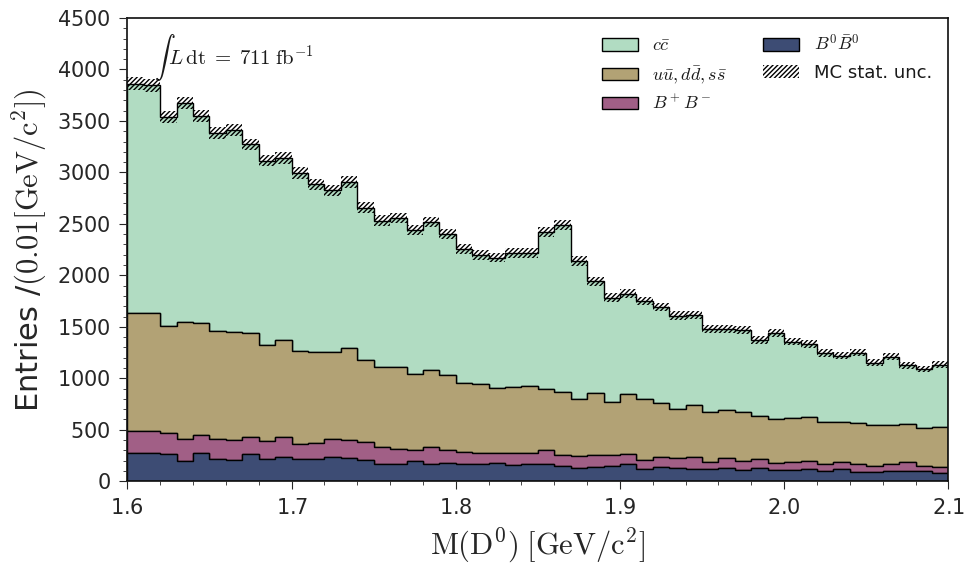

In [16]:
var = 'D0_M'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  
xrange = (1.67,2.1)
xrange = (1.6,2.1)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
img_path = plot_directory + "/b2bii_DD0etaeta_gpi_tag_loose_v0_D0M.png"

# img_path = plot_directory + "/test.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)
# plt.ylim(0,90000)
# plt.savefig(img_path)


[ 815.  981. 1173. 1347. 1406. 1577. 1669. 1634. 1863. 1857. 1960. 2101.
 2421. 2565. 2442. 2465. 2263. 2295. 2371. 2249. 2289. 2313. 2420. 2358.
 2375. 2319. 2402. 2420. 2403. 2416. 2426. 2424. 2467. 2446. 2338. 2426.
 2488. 2422. 2541. 2567. 2526. 2350. 2478. 2534. 2532. 2532. 2580. 2481.
 2444. 2552.]
fitst_bin_entries=815.0


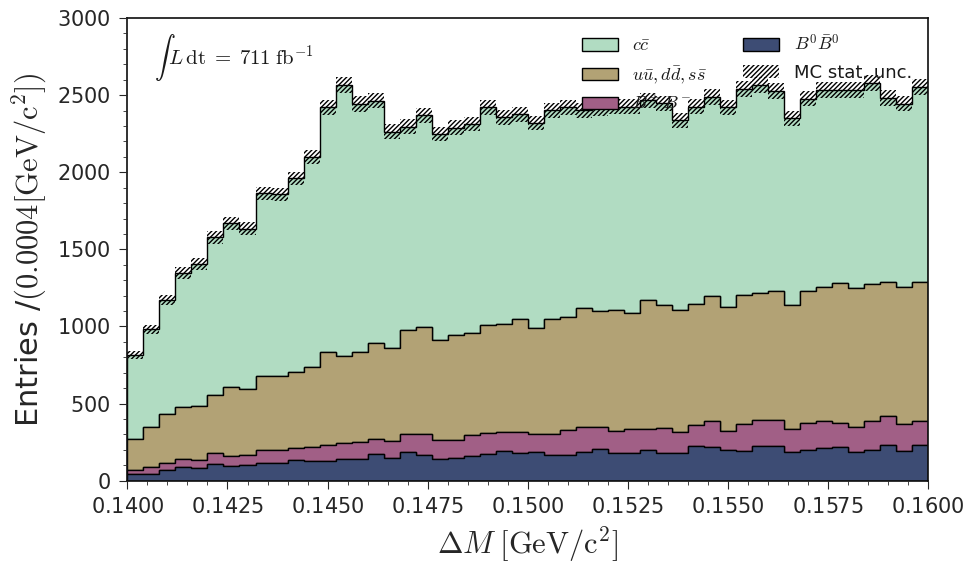

In [17]:
var = 'Dstarp_delM'
data  = [pd_mixed[var], pd_charged[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.140,0.16)
nbins = 50
xlabel = "$\Delta M$"

# img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_Dstarp_delM_step0.png"
# img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_tight_selv1_Dstarp_delM.png"
img_path = plot_directory + "/b2bii_DD0etaeta_gpi_tag_loose_v0_delM.png"


# img_path = plot_directory + "/test.png"
# plt.xticks(fontsize=12)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)
